In [11]:
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt

training_data = pd.read_csv('data/training_data.csv')

training_x = training_data.iloc[:, 1:5].to_numpy()      # 105 rows and 4 columns.
training_label = training_data.iloc[:, 5].to_numpy()    # 105 rows and 1 columns.

def get_distance(instance1, instance2):
    return np.linalg.norm(instance1 - instance2)

def get_neighbors(instance, k):
    distances = []
    
    for i in range(len(training_data)):
        distances += [get_distance(training_x[i], instance)]
    
    distances = np.array(distances)
    sorted_indices = np.argsort(distances)
    
    distances = np.array(distances)
    neighbors = sorted_indices[:k]

    return neighbors

def get_class(neighbors):
    neighbors_label = training_label[neighbors]
    class_index = Counter(neighbors_label)
    
    # print(class_index)  
    return (max(class_index.keys(), key=class_index.get))

def get_accuracy(array1, array2):
    # if array1[i] - array2[i] == 0 
    # that means array1[i] == array2[i]
    # it would be an accurate prediction.
    difference_count = Counter(array1 - array2)
    # print(difference_count[0])
    # print(len(array1))
    return difference_count[0] / len(array1)


In [12]:
# test_data = [5.5, 2.3, 4, 1.3]

# k = 30
# neighbor = get_neighbors(test_data, k)
# data_class = get_class(neighbor)
# print(data_class)

[0.9777777777777777, 0.9777777777777777, 0.9777777777777777, 0.9777777777777777, 0.9777777777777777, 0.9777777777777777, 0.9777777777777777, 0.9777777777777777, 0.9777777777777777, 0.9777777777777777, 0.9555555555555556, 0.9555555555555556, 0.9555555555555556, 0.9555555555555556, 0.9555555555555556, 0.9555555555555556, 0.9555555555555556, 0.9555555555555556, 0.9555555555555556, 0.9555555555555556, 0.9555555555555556, 0.9555555555555556, 0.9555555555555556, 0.9555555555555556, 0.9333333333333333, 0.9555555555555556, 0.9555555555555556, 0.9555555555555556, 0.9555555555555556, 0.9555555555555556, 0.9555555555555556, 0.9555555555555556, 0.9555555555555556, 0.9555555555555556, 0.9333333333333333, 0.9333333333333333, 0.9333333333333333, 0.9333333333333333, 0.9111111111111111, 0.9111111111111111, 0.8888888888888888, 0.8888888888888888, 0.8888888888888888, 0.8888888888888888, 0.8888888888888888, 0.9111111111111111, 0.9111111111111111, 0.9111111111111111, 0.8888888888888888, 0.8888888888888888]

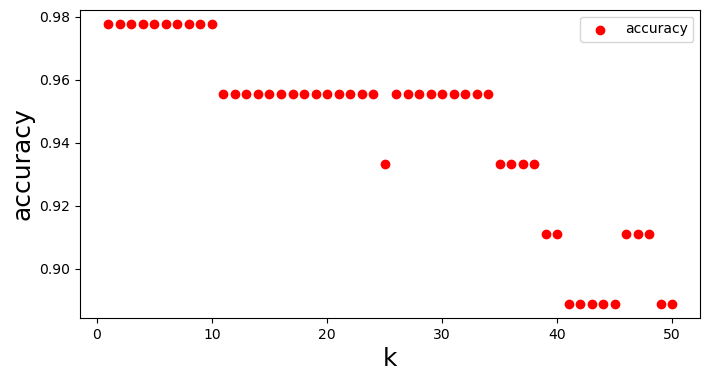

In [15]:
test_data = pd.read_csv('data/test_data.csv')

test_x = test_data.iloc[:,1:5].to_numpy()
test_labels = test_data.iloc[:,5].to_numpy()

accuracy = []

for k in range(1, 51):
    pred_array = []
    for item in test_x:
        item_neighbors = get_neighbors(item, k)
        item_class = get_class(item_neighbors)
        pred_array.append(item_class)
    # print(pred_array)
    accuracy.append(get_accuracy(np.array(pred_array), test_labels))    
print(accuracy)

print()

plt.figure(figsize=(8, 4))  # figsize:确定画布大小 

plt.scatter(np.arange(1, 51), accuracy, c='red', label='accuracy') 
plt.xlabel(u'k', fontsize=18)
plt.ylabel(u'accuracy', fontsize=18)

plt.legend()  # 显示图例

plt.show()  # 显示所绘图形
